# Učitavanje knjižnica i podataka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
X = pd.read_csv("heart.csv")

# O istraživanju

Kao vrstu istraživanja prema svrsi ovo istraživanje bih svrstao u <b>primijenjeno istraživanje</b> zato što koristimo teoretska znanja iz medicine kako bismo stvorili praktično znanstveno znanje o zatajenju srca.<br><br>
Prema izvoru informacija ovo bih istraživanje svrstao u <b>sekundarno istraživanje</b> zato što sve informacije i podatci su preuzeti iz prijašnjih medicinskih skupva podataka u svrhu poboljšanja modela strojnog učenja. Odnosno istraživač nije prikupio podatke iz prve ruke.<br><br>

Kada govorimo o vremenskoj provedbi smatram da ovo istraživanje pripada <b>studiji presjeka, odnosno sinkronom istraživanju</b>. To je zato što su opažanja nad pojedincima uzeta u određenom trenutku. Nije se pratilo stanje pojedinca kroz godine da bi se zaključila vjerojatnost zatajenja srca nego su za svakog pojedinca samo jedan podatak u za jedan trenutak.<br><br>

Prema načinu na koji su podatci prikupljeni rekao bih da ovo istraživanje pripada <b>dokumentarnom istraživanju</b> zbog toga što se koriste informacije iz postojećih medicinskih izvora o zatajenju srca.<br><br>

Vrsta podataka korištena u ovom članku nam sugerira da se radi o <b>kvantitativnom istraživanju</b> jer koristimo mjerljive varijable ( kao što su npr. razina kolesterola, godine, otkucaji srca ) kako bismo predvidjeli zatajenje srca. Ne koriste se razgovorne ili bilokakve druge metode koje uključuju sudionikovo mišljenje kao određenu varijablu, već su sve varijable dobivene nekim oblikom mjerenja.<br><br>

S obzirom na to da u eksperimentu ne kontroliramo nikakve varijable, za prikupljanje podataka o pacijentu dovoljno je bilo odraditi mjerenja nad pacjentom tijekom tjelovježbe te nismo mogli manipulirati varijablama kako bismo otkrili njihovu uzročo-posljedičnu vezu sa zatajenjem srca, već smo dobili određene očitane vrijednosti s kojima smo proveli istraživanje. Zbog svega toga smatram da ovo israživanje pripada promatračkom odnosno <b>opservacijskom istraživanju</b>. <br><br>

Prema dubini ovo istraživanje možemo svrstati u <b>istraživačko istraživanje</b> zato što problem zatajenja srca još nije dovoljno dobro shvaćen i istražen i neznamo točno kako kada i kako će nastati te što sve ima utjecaj na njega. Istraživanje se oslanja na prikupljene podatke kako bi se mogao donijeti zaključak hoće li pacijent dobiti srčano zatajenje ili ne.<br><br>

Konačno promatramo li istraživanje s obzirom na vrstu zaključka rekao bih da ovo istraživanje pripada <b>hipotetičko-deduktivnom istraživanju</b> zato što smo promatranjem stvarnosti postavili hipotezu što sve utječe na zastoj srca te smo donijeli zaključak koji ćemo kroz iskustvo odbaciti ili prihvatiti.<br><br>

Podatci za članak su prikupljeni <b>dokumentarnim istraživanjem</b> zato što su preuzeti iz web-baza medicinskih skupova podataka objavljenih na internetu. Konkretno podatci su uzeti sa javno dostupne Kaggle web-stranice.<br><br>

Podatci su prikupljeni na etički način jer su prikupljeni ravno iz medicinskih ustanova koje su osigurale fizičku i psihičku zaštitu ispitanika koji su dobroboljno pristali na sudjelovanje pritom primeći novčanu naknadu te su upoznati sa prirodom istraživanja. Nnjihov indentitet je ostao anoniman jer ne postoji niti jedan podatak u bazi s kojim bi smo mogli povezati određenog pacjenta. S obzirom da se radi o profesionalnom medicinskom osoblju možemo predpostaviti da su istraživači djelovali u skladu sa zakonom, nisu namjestili rezultate ( zato što od toga ionako ne bi imali nikakvu korist jer je cilj ionako nije monetariziran ) te su ozbiljno shvatili osobnu sigurnost prilikom prikupljanja podataka.


# Augmentacija podataka

Provodimo blagu augmentaciju nad podatcima radi povećanja skupa podataka kako bi lakše bilo trenirati modele strojnog učenja. Augmentaciju provodimo na način da uzimamo postojeće podatke te blago alteriramo vrjednosti značajki: Age, RestingBP te Cholesterol.

In [3]:
import random
import math
import warnings
warnings.filterwarnings('ignore')

def add_random(x,col,integer=True):
    
    for i in range(len(x.values)):
        
        
        coin = random.randint(1, 2)
        sign = 1

        if(coin==1):

            sign*=-1


        rand_add = random.uniform(0, 1)/20
        result = x[i]+rand_add*x[i]*sign 

        if(integer):

            result = int(result)
            
        M[col].iloc[i] = result

        #print(result)
        #print(x[i])
    

M = X.copy()
df = pd.DataFrame()
#print(M)
for i, j in M.iterrows():
    #print(j["Age"])
    df.append(j)
    #print()
print(M)
add_random(M["Age"],col="Age") 
add_random(M["RestingBP"],col="RestingBP")
add_random(M["Cholesterol"],col="Cholesterol")
print(M)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

Prvo radimo podjelu na test za treniranje i test za ucenje kako bismo augmentirane podatke dodali skupu za ucenje da ne unosimo nikakvu pristranost u skup za testiranje.

In [4]:
y = X.loc[:, 'HeartDisease']
X, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Dodajemo augmentirane podatke skupu za učenje.

In [5]:
X = X.append(M)
y_train = y_train.append(M['HeartDisease'])
print(y_train)

593    1
900    1
529    1
708    1
364    0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 1606, dtype: int64


# Eksploratorna analiza podataka

Prikaz prvih nekoliko podataka iz baze

In [6]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
593,64,M,ASY,130,258,1,LVH,130,N,0.0,Flat,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
529,72,M,ASY,143,211,0,Normal,109,Y,1.4,Flat,1
708,54,M,ASY,110,206,0,LVH,108,Y,0.0,Flat,1
364,56,M,NAP,120,0,0,Normal,97,N,0.0,Flat,0


Pojašnjenja značajki:
 - Age - starost pacjenta u godinama  
 - Sex - spol pacjenta ( M - muško, Ž - žensko)
 - ChestPainType - tip boli u prsima
 - RestingBP - krvni tlak izmjeren tjekom mirovanja pacjenta u mmHg
 - Cholesterol - razina kolesterola u mg/dL
 - FastingBS - nivo šećera kod pacjenta izražen kao kategorička varijabla gdje 0 označava ispod 120mg/dl, a 1 iznad 120mg/dl
 - RestingECG - rezultat ECG mjerenja prikazan kao kategorička varijabla od 0-2 što označava značajnost boli
 - MaxHR - maksimalna vrjednost broja otkucaja srca u minuti
 - ExerciseAngina - parametar ( 0 ili 1 ) koji određuje je li tjelovježba inducirala anginu kod pacjenta
 - Oldpeak - realni broj ( između 0 i 6.2 ) koji određuje status pacjentove depresije 
 - ST_Slope - kondicija pacjenta tijekom izvođenja tjelovježbe ( Up - rastuca, Flat - konstantna, Down - padajuca)
 - HeartDisease - ciljna varijabla - vjerojatnost da će pacjent dobiti zatajenje srca ( 0 - pretpostavlja se da nema vjerojatnosti za zatajenje srca, 1 - jaka vjerojatnost zatajenja srca kod pacjenta)

In [7]:
X.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,53.164384,131.840598,198.665629,0.234122,136.923412,0.894645,0.554795
std,9.483043,18.512220,109.261370,0.423581,25.422996,1.062881,0.497143
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,141.000000,265.750000,0.000000,156.000000,1.500000,1.000000
max,79.000000,208.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Pregled formata u kojem su podatci zapisani

In [8]:
X.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

(array([  3.,   9., 650., 203., 418., 207.,  81.,  32.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <BarContainer object of 10 artists>)

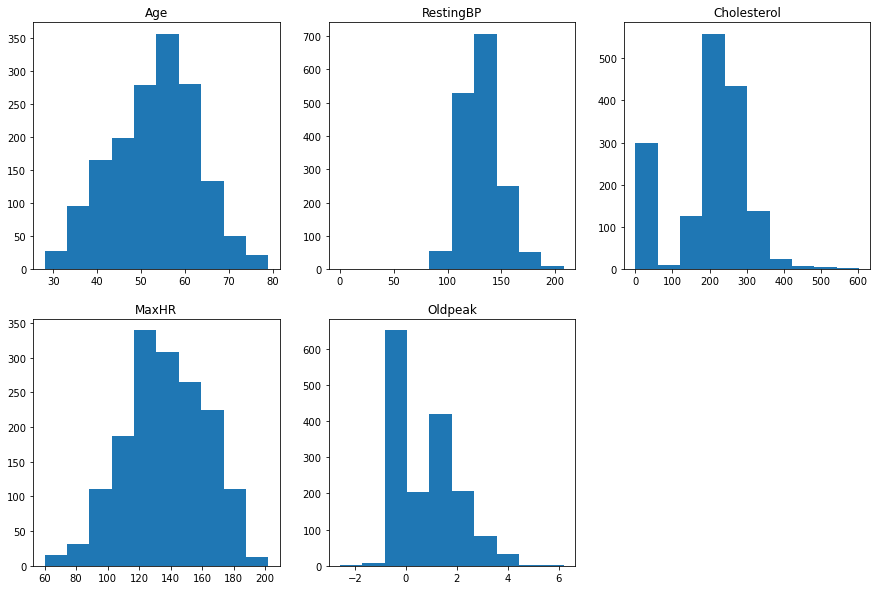

In [9]:
fig = plt.figure(figsize=(15, 10))
subplot(2,3,1)
title("Age")
plt.hist(X["Age"])
subplot(2,3,2)
title("RestingBP")
plt.hist(X["RestingBP"])
subplot(2,3,3)
title("Cholesterol")
plt.hist(X["Cholesterol"])
subplot(2,3,4)
title("MaxHR")
plt.hist(X["MaxHR"])
subplot(2,3,5)
title("Oldpeak")
plt.hist(X["Oldpeak"])

Vidimo iz prikazanih grafova da se većina varijabli ravna po nekoj distribuciji sličnoj normalnoj distribuiji što nam je jako dobra stvar jer većina testova zahtjeva ravnanje distribucije podataka po normalnoj distribuciji
ili nekoj distribuciji sličnoj normalnoj.
Vidimo da Odlpeak i Cholesterol odstupaju od normalne distribucije i kod njih očekujemo da ćemo imati dosta "outliera" što ćemo provjeriti daljnom analizom.<br><br>
Ovi hisgogrami će nam također pomoći kada ćemo trebati raditi "bucketing" podataka da bismo znali odrediti "bucket" kategorije.

{'whiskers': [<matplotlib.lines.Line2D at 0x20ed8cdf070>,
 'caps': [<matplotlib.lines.Line2D at 0x20ed8cdf610>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ed8cbdbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ed8cdfbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ed8cdfe80>],
 'means': []}

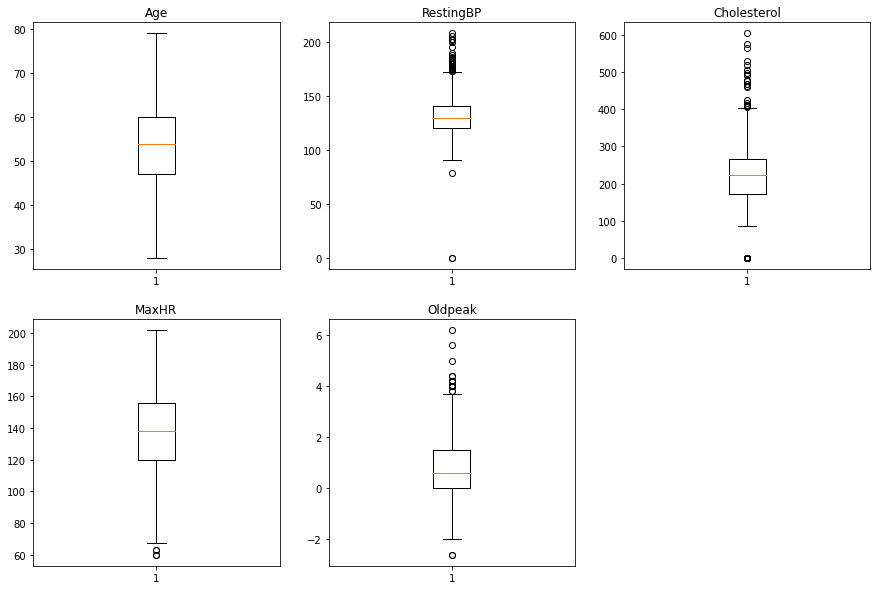

In [10]:
fig = plt.figure(figsize=(15, 10))
subplot(2,3,1)
title("Age")
plt.boxplot(X["Age"])
subplot(2,3,2)
title("RestingBP")
plt.boxplot(X["RestingBP"])
subplot(2,3,3)
title("Cholesterol")
plt.boxplot(X["Cholesterol"])
subplot(2,3,4)
title("MaxHR")
plt.boxplot(X["MaxHR"])
subplot(2,3,5)
title("Oldpeak")
plt.boxplot(X["Oldpeak"])

Boxplotovi su nam odlična vizualizacija ukoliko želimo vidjeti imaju li naši podatci "outliere". Iz prikazanih dijagrama možemo vidjeti da RestingBP, Cholesterol i Oldpeak imaju poprilično veliki broj outliera što nam pomaže kada ćemo kasnije odlučivati hoćemo li ih zadržati ili napraviti neku transformaciju.

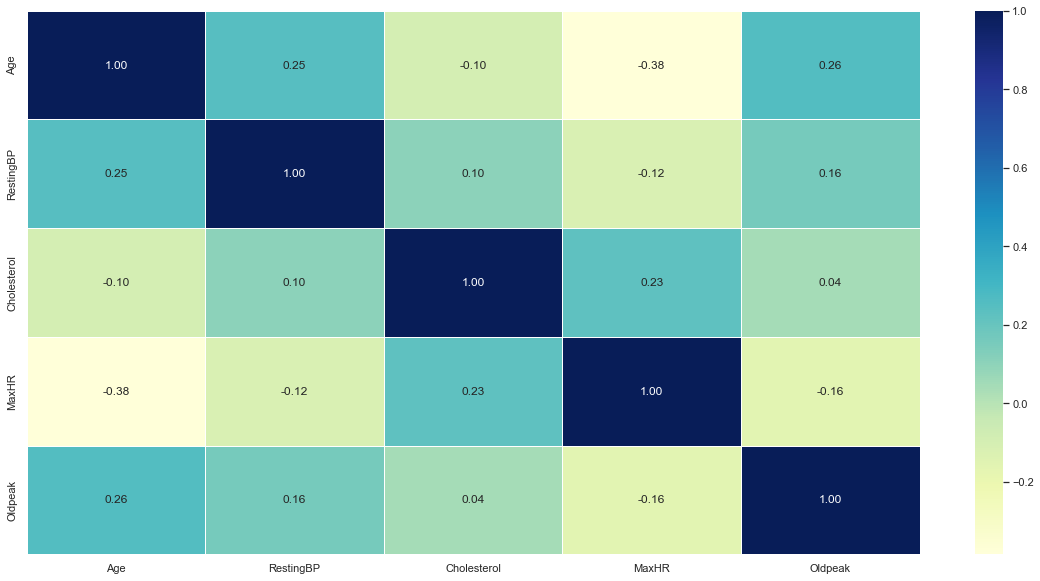

In [11]:
Z = X[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
Z.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(Z.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Korelacijski dijagram nam je dobar ukoliko želimo vidjeti postoji li neka zavisnost između naših značajka. To je bitno jer dosta modela strojnog učenja zahtjeva nezavisnost između značajki kako bi njihova predikcija bila stabilna. Iz dijagrama najveću korelaciju možemo uočiti između varijabli MaxHR i Age ( -0.38, - predznak označava da su suprotno korelirane odnosno da povećanje jedne uzrokuje smanjenje druge ) te ćemo zato načini scatter plot dijagram između te dvije varijable kako bismo vidjeli možemo li stvarno uočiti neki trend između te dvije značajke.

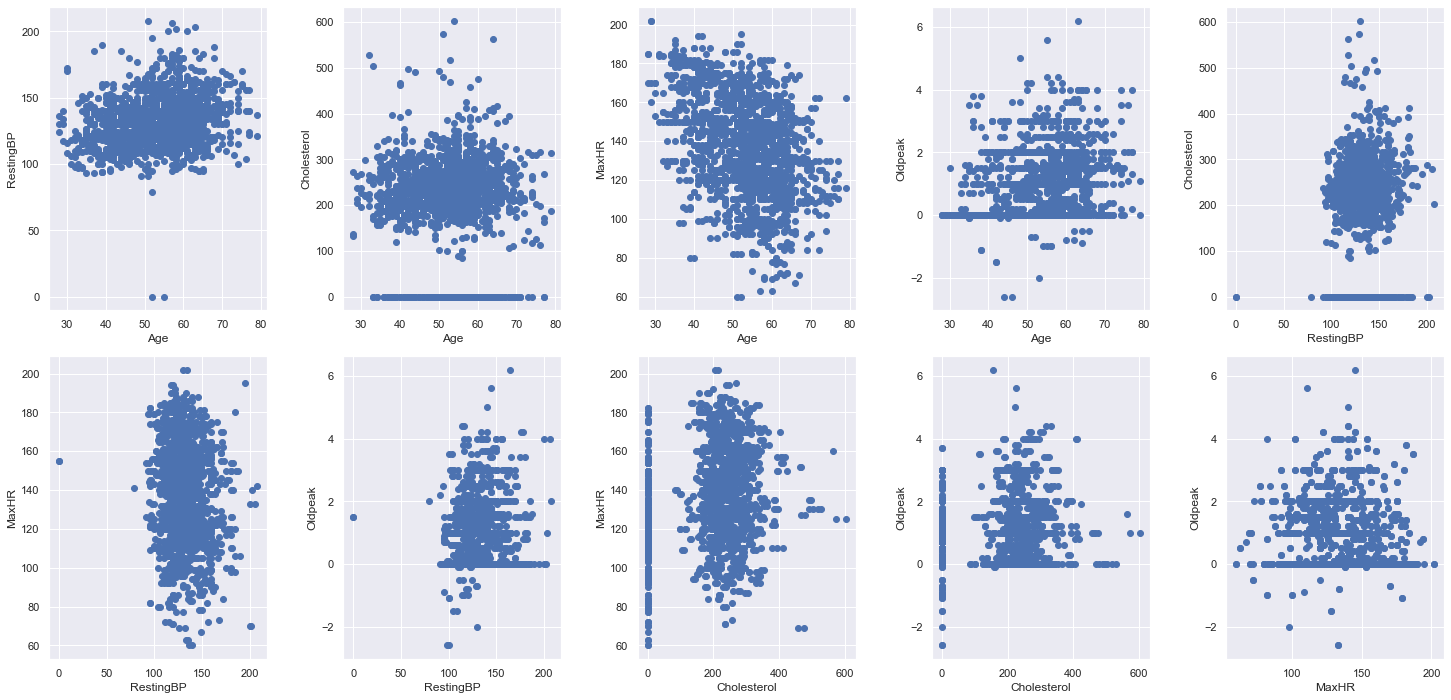

In [12]:
figure(figsize = (25, 12))
subplots_adjust(wspace=0.35, hspace = 0.15)
x = it.combinations(["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"],2)
c = 0
for i in x:
    subplot(2,5,c+1)
    c+=1
    plt.scatter(X[i[0]],X[i[1]])
    plt.xlabel(i[0])
    plt.ylabel(i[1])

    

Iz grafova isto kao što smo i uočili iz kovarijacijske matrice možemo vidjeti da značajke su međusobno linearno nezavisne. Najveću zavisnost kao što i možemo izčitati iz kovarijacijske matrice vidimo između značajki MaxHR i Age, no ona je dovoljno mala pa ju možemo zanemariti u daljnoj analizi.

([<matplotlib.patches.Wedge at 0x20ed96485b0>,
 [Text(-0.18842255867692193, 1.0837421000319412, '1'),
  Text(0.1884226601441795, -1.0837420823905435, '0')])

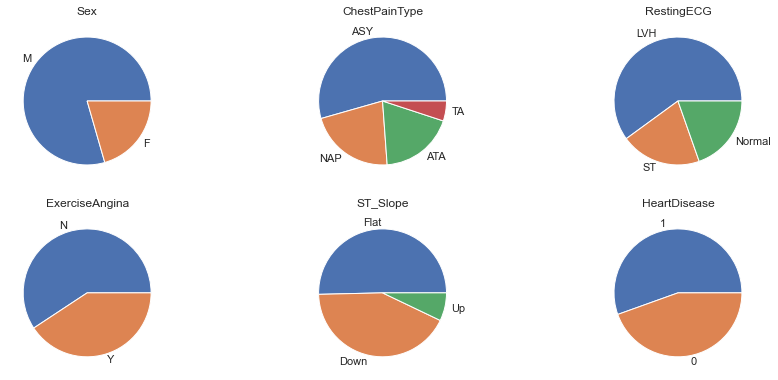

In [13]:
fig = plt.figure(figsize=(15, 10))
subplot(3,3,1)
title("Sex")
y = [x for x in X["Sex"].value_counts()]
y_labels = [x for x in X["Sex"].unique()]
plt.pie(y,labels = y_labels)
subplot(3,3,2)
title("ChestPainType")
y = [x for x in X["ChestPainType"].value_counts()]
y_labels = [x for x in X["ChestPainType"].unique()]
plt.pie(y,labels = y_labels)
subplot(3,3,3)
title("RestingECG")
y = [x for x in X["RestingECG"].value_counts()]
y_labels = [x for x in X["RestingECG"].unique()]
plt.pie(y,labels = y_labels)
subplot(3,3,4)
title("ExerciseAngina")
y = [x for x in X["ExerciseAngina"].value_counts()]
y_labels = [x for x in X["ExerciseAngina"].unique()]
plt.pie(y,labels = y_labels)
subplot(3,3,5)
title("ST_Slope")
y = [x for x in X["ST_Slope"].value_counts()]
y_labels = [x for x in X["ST_Slope"].unique()]
plt.pie(y,labels = y_labels)
subplot(3,3,6)
title("HeartDisease")
y = [x for x in X["HeartDisease"].value_counts()]
y_labels = [x for x in X["HeartDisease"].unique()]
plt.pie(y,labels = y_labels)

Za kategorijske varijable koristimo pitni dijagram da bismo dobili osjet kako nam se one ravnaju. Cilj nam je da je svaka kategorija zastupljena u nekom broju jer mnogi algoritmi strojnog učenja imaju problem sa neravnomjerno raspoređenim kategorijama. U ovom slučaju vidimo da je raspodjela više manje uredu, osim kod ChestPaintType i ST_Slope vidimo malu neravnotežu, no ništa što bi nam stvaralo daljne probleme u analizi.

# Čišćenje podataka

Želimo vidjeti imaju li podatci nekih nedostajućih vrjednosti

In [14]:
X.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
missing_values_columns = []
for i in X:
    
    for value in X[i].values:
        
        
        if(value in ["-", "x", "NULL", 'N/A', 'BLANK', '„', '?', '???']):
            
            missing_values_columns.append(i)
            
if(not missing_values_columns):
    
    print("Potential no missing values!")
    
else:
    
    print(f"Missing values probably in {missing_values_column}")

Potential no missing values!


Možemo vidjeti da u skupu podataka nemamo nedostajućih vrjednosti

Sada želiimo detektirati potencijalne stršeće vrjednosti gledajući histograme i boxplot dijagrame značajki

In [16]:
print("Oldpeak")
print(f"Potential number of outliers: {((X.Oldpeak>4.5) | (X.Oldpeak<-2)).sum()}")
print(f"Potential outliers: \n{X.Oldpeak[(X.Oldpeak>4.5) | (X.Oldpeak<-2)]}")
print()
print("RestingBP")
print(f"Potential number of outliers: {((X.RestingBP>200) | (X.RestingBP<75)).sum()}")
print(f"Potential outliers: \n{X.RestingBP[(X.RestingBP>200) | (X.RestingBP<75)]}")
print()
print("Cholesterol")
print(f"Potential number of outliers: {((X.Cholesterol>500) | (X.Cholesterol<0)).sum()}")
print(f"Potential outliers: \n{X.Cholesterol[(X.Cholesterol>500) | (X.Cholesterol<0)]}")

Oldpeak
Potential number of outliers: 5
Potential outliers: 
324   -2.6
166    5.0
324   -2.6
771    5.6
850    6.2
Name: Oldpeak, dtype: float64

RestingBP
Potential number of outliers: 6
Potential outliers: 
449      0
241    208
365    203
399    202
449      0
732    206
Name: RestingBP, dtype: int64

Cholesterol
Potential number of outliers: 6
Potential outliers: 
30     518
76     529
149    603
76     504
149    574
616    563
Name: Cholesterol, dtype: int64


Proučavajući histograme i boxplot dijagrame uočili smo neke vrijednosti koje znatno odskaču od distribucije te smo ih odlučili ukloniti kako nam nebi semtale kod treniranja modela.

In [17]:
#X = X.drop(X[X.RestingBP < 75].index)
#X = X.drop(X[X.Oldpeak > 4.5].index)
#X = X.drop(X[X.Cholesterol>500].index)
#X = X.drop(X[X.Oldpeak<-2].index)
#print(X)

# Obrada kategoričkih varijabli i bucketing podataka

Želimo pretvoriti kategoričke varijable koje su zapisane kao stringovi u numerički format jer korišteni algoritmi strojnog učenja ne mogu raditi sa stringom kao tipom podatka određene značajke.<br>
Osim toga željeli bismo značajke koje imaju kontinuirane vrjednosti smjestiti u diskretizirane kategorije jer neki algoritmi ( npr. Decision Tree ) zahtjevaju ovakvu transformaciju podataka.

In [18]:
Z = X.copy()

In [19]:
def gender_to_numeric(x):
    if x=='M': return 2
    if x=='F':   return 1
    
def CPT_to_numeric(x):
    if x=='ATA': return 2
    if x=='NAP':   return 1
    if x=="TA": return 3
    if x=="ASY": return 4
    
def RECGN_to_numeric(x):
    if x=='Normal': return 2
    if x=='ST':   return 1
    if x=="LVH": return 3
    
def STS_to_numeric(x):
    if x=='Up': return 2
    if x=='Down':   return 1
    if x=="Flat": return 3
    
def EA_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1


In [20]:
labels = [0,1,2,3]
#Z['AgeB']=pd.cut(x=Z['Age'], bins=[30,40,50,60,70], labels = labels)
Z['SexN'] = Z['Sex'].apply(gender_to_numeric)
Z['ChestPainTypeN'] = Z['ChestPainType'].apply(CPT_to_numeric)
Z['RestingECGN'] = Z['RestingECG'].apply(RECGN_to_numeric)
Z['ST_SlopeN'] = Z['ST_Slope'].apply(STS_to_numeric)
Z['ExerciseAnginaN'] = Z['ExerciseAngina'].apply(EA_to_numeric)
print(Z)
X_test['SexN'] = X_test['Sex'].apply(gender_to_numeric)
X_test['ChestPainTypeN'] = X_test['ChestPainType'].apply(CPT_to_numeric)
X_test['RestingECGN'] = X_test['RestingECG'].apply(RECGN_to_numeric)
X_test['ST_SlopeN'] = X_test['ST_Slope'].apply(STS_to_numeric)
X_test['ExerciseAnginaN'] = X_test['ExerciseAngina'].apply(EA_to_numeric)
print(X_test)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
593   64   M           ASY        130          258          1        LVH   
900   58   M           ASY        114          318          0         ST   
529   72   M           ASY        143          211          0     Normal   
708   54   M           ASY        110          206          0        LVH   
364   56   M           NAP        120            0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        107          253          0     Normal   
914   64   M           ASY        146          188          1     Normal   
915   59   M           ASY        133          130          0     Normal   
916   57   F           ATA        130          241          0        LVH   
917   37   M           NAP        143          179          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  SexN  \
593    130          

Smještanje kontinuiranih vrijednosti u kategorije, odnosno "bucketing"

In [21]:
W = Z.copy()

labels = [0,1,2,3,4]
W['AgeB']=pd.qcut(x=W['Age'], q=5, labels = labels)
labels = [0,1,2]
W['RestingBPB']=pd.qcut(x=W['RestingBP'], q = 3, labels = labels)
labels = [0,1,2,3]
W['CholesterolB']=pd.qcut(x=W['Cholesterol'], q = 4, labels = labels)
labels = [0,1,2,3,4,5,6,7]
W['MaxHRB']=pd.qcut(x=W['MaxHR'], q = 8, labels = labels)
labels = [0,1,2,3]
W['OldpeakB']=pd.qcut(x=W['Oldpeak'],q = 4, labels = labels)
print(W)
labels = [0,1,2,3,4]
X_test['AgeB']=pd.qcut(x=X_test['Age'], q=5, labels = labels)
labels = [0,1,2]
X_test['RestingBPB']=pd.qcut(x=X_test['RestingBP'], q = 3, labels = labels)
labels = [0,1,2,3]
X_test['CholesterolB']=pd.qcut(x=X_test['Cholesterol'], q = 4, labels = labels)
labels = [0,1,2,3,4,5,6,7]
X_test['MaxHRB']=pd.qcut(x=X_test['MaxHR'], q = 8, labels = labels)
labels = [0,1,2,3]
X_test['OldpeakB']=pd.qcut(x=X_test['Oldpeak'],q = 4, labels = labels)
print(X_test)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
593   64   M           ASY        130          258          1        LVH   
900   58   M           ASY        114          318          0         ST   
529   72   M           ASY        143          211          0     Normal   
708   54   M           ASY        110          206          0        LVH   
364   56   M           NAP        120            0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        107          253          0     Normal   
914   64   M           ASY        146          188          1     Normal   
915   59   M           ASY        133          130          0     Normal   
916   57   F           ATA        130          241          0        LVH   
917   37   M           NAP        143          179          0     Normal   

     MaxHR ExerciseAngina  Oldpeak  ... SexN  ChestPainTypeN  RestingECGN  \
593    130

# Implementacija

Za implementacijske algoritme koristiti ćemo: Logističku regresiju, Naivni Bayesov klasifikator, Stroj potpornih vektora, Slučajnu šumu i Stablo odluke.<br>
Kako bismo ocjenili modele podjeliti ćemo skupove podatak na skup za učenje i skup za testiranje. Modele ćemo učiti na skupu za učenje a njihovu ocjenu raditi na odvojenom testnom skupu podataka.

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [23]:
X_train = Z.loc[:,['Age',"RestingBP","Cholesterol","MaxHR","Oldpeak","SexN","ChestPainTypeN","RestingECGN","ST_SlopeN","ExerciseAnginaN"]]
X_test = X_test.loc[:,['Age',"RestingBP","Cholesterol","MaxHR","Oldpeak","SexN","ChestPainTypeN","RestingECGN","ST_SlopeN","ExerciseAnginaN"]]
print(X_train)

     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  SexN  ChestPainTypeN  \
593   64        130          258    130      0.0     2               4   
900   58        114          318    140      4.4     2               4   
529   72        143          211    109      1.4     2               4   
708   54        110          206    108      0.0     2               4   
364   56        120            0     97      0.0     2               1   
..   ...        ...          ...    ...      ...   ...             ...   
913   45        107          253    132      1.2     2               3   
914   64        146          188    141      3.4     2               4   
915   59        133          130    115      1.2     2               4   
916   57        130          241    174      0.0     1               2   
917   37        143          179    173      0.0     2               1   

     RestingECGN  ST_SlopeN  ExerciseAnginaN  
593            3          3                1  
900            1 

In [24]:
#Logisticka regresija
log_reg = LogisticRegression(random_state=0,max_iter=2000).fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_pred,y_test)
log_precision = precision_score(y_pred,y_test)
log_recall = recall_score(y_pred,y_test)
log_f1 = f1_score(y_pred,y_test)
log_confusion = confusion_matrix(y_pred,y_test)
#print(log_reg.score(X_test,y_test))
#print(precision_recall_fscore_support(y_pred,y_test))
#print(confusion_matrix(y_pred,y_test))

In [25]:
#Naivni Bayesov klasifikator
gnb = GaussianNB().fit(X_train,y_train)
y_pred = gnb.predict(X_test)
nb_accuracy = accuracy_score(y_pred,y_test)
nb_precision = precision_score(y_pred,y_test)
nb_recall = recall_score(y_pred,y_test)
nb_f1 = f1_score(y_pred,y_test)
nb_confusion = confusion_matrix(y_pred,y_test)
#print(gnb.score(X_test,y_test))
#print(precision_recall_fscore_support(y_pred,y_test))
#print(confusion_matrix(y_pred,y_test))

Za stroj potpornih vektora bilo je potrebno skalirati podatke jer je SVM osjetljiv na razlike u skalama

In [26]:
#Stroj potpornih vektora
from sklearn.pipeline import make_pipeline

SVM = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train,y_train)
y_pred = SVM.predict(X_test)
svm_accuracy = accuracy_score(y_pred,y_test)
svm_precision = precision_score(y_pred,y_test)
svm_recall = recall_score(y_pred,y_test)
svm_f1 = f1_score(y_pred,y_test)
svm_confusion = confusion_matrix(y_pred,y_test)
#print(SVM.score(X_test,y_test))
#print(precision_recall_fscore_support(y_pred,y_test))
#print(confusion_matrix(y_pred,y_test))

Za slučajnu šumu i stablo odluke koristit ćemo Bucket verziju podataka jer je onda potrebna ukoliko želimo što precizniji rad algoritama.

In [27]:
x = W.loc[:,['AgeB',"RestingBPB","CholesterolB","MaxHRB","OldpeakB","SexN","ChestPainTypeN","RestingECGN","ST_SlopeN","ExerciseAnginaN"]]
y = X.loc[:, 'HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [28]:
#Slučajna suma
RF = RandomForestClassifier(random_state=0).fit(X_train,y_train)
y_pred = RF.predict(X_test)
rf_accuracy = accuracy_score(y_pred,y_test)
rf_precision = precision_score(y_pred,y_test)
rf_recall = recall_score(y_pred,y_test)
rf_f1 = f1_score(y_pred,y_test)
rf_confusion = confusion_matrix(y_pred,y_test)
#print(RF.score(X_test,y_test))
#print(precision_recall_fscore_support(y_pred,y_test))
#print(confusion_matrix(y_pred,y_test))

In [29]:
#Decision tree

DT = DecisionTreeClassifier(random_state=0, max_depth=15).fit(X_train,y_train)
y_pred = DT.predict(X_test)
DT.fit(X_test,y_test)
dt_accuracy = accuracy_score(y_pred,y_test)
dt_precision = precision_score(y_pred,y_test)
dt_recall = recall_score(y_pred,y_test)
dt_f1 = f1_score(y_pred,y_test)
dt_confusion = confusion_matrix(y_pred,y_test)
#print(DT.score(X_test,y_test))
#print(precision_recall_fscore_support(y_pred,y_test))
#print(confusion_matrix(y_pred,y_test))

# Prikaz rezultata

Dobivene rezultate provedbe algoritama nad skupom podataka usporediti ćemo koristeći sljedećih pet stavki: Točnost, Preciznost, Odaziv, Fall-out i matricu konfuzije.

In [30]:
print("Logistička regresija")
print("--------------------\n")
print(f"Accuracy: {log_accuracy}\nPrecision: {log_precision}\nRecall: {log_recall}\nF1: {log_f1}\nConfusion: \n{log_confusion}\n")

Logistička regresija
--------------------

Accuracy: 0.8782608695652174
Precision: 0.896
Recall: 0.8818897637795275
F1: 0.8888888888888887
Confusion: 
[[ 90  13]
 [ 15 112]]



In [31]:
print("Naivni Bayesov klasifikator")
print("--------------------\n")
print(f"Accuracy: {nb_accuracy}\nPrecision: {nb_precision}\nRecall: {nb_recall}\nF1: {nb_f1}\nConfusion: \n{nb_confusion}\n")

Naivni Bayesov klasifikator
--------------------

Accuracy: 0.8521739130434782
Precision: 0.88
Recall: 0.8527131782945736
F1: 0.8661417322834645
Confusion: 
[[ 86  15]
 [ 19 110]]



In [32]:
print("Stroj potpornih vektora")
print("--------------------\n")
print(f"Accuracy: {svm_accuracy}\nPrecision: {svm_precision}\nRecall: {svm_recall}\nF1: {svm_f1}\nConfusion: \n{svm_confusion}\n")

Stroj potpornih vektora
--------------------

Accuracy: 0.9347826086956522
Precision: 0.952
Recall: 0.9296875
F1: 0.9407114624505929
Confusion: 
[[ 96   6]
 [  9 119]]



In [33]:
print("Slučajna šuma")
print("--------------------\n")
print(f"Accuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}\nF1: {rf_f1}\nConfusion: \n{rf_confusion}\n")

Slučajna šuma
--------------------

Accuracy: 0.917910447761194
Precision: 0.9575471698113207
Recall: 0.8942731277533039
F1: 0.9248291571753986
Confusion: 
[[166   9]
 [ 24 203]]



In [34]:
from sklearn import tree
print("Stablo odluka")
print("--------------------\n")
print(f"Accuracy: {dt_accuracy}\nPrecision: {dt_precision}\nRecall: {dt_recall}\nF1: {dt_f1}\nConfusion: \n{dt_confusion}\n")

Stablo odluka
--------------------

Accuracy: 0.8980099502487562
Precision: 0.9245283018867925
Recall: 0.8868778280542986
F1: 0.9053117782909931
Confusion: 
[[165  16]
 [ 25 196]]



<br>Zaseban tablični prikaz svih podataka radi usporedbe:

In [35]:
raw_data = {
            'Accuracy': [log_accuracy, nb_accuracy, svm_accuracy, rf_accuracy,dt_accuracy],
            'Precision': [log_precision, nb_precision, svm_precision, rf_precision, dt_precision],
            'Recall': [log_recall, nb_recall, svm_recall, rf_recall, dt_recall],
            'F1': [log_f1, nb_f1, svm_f1, rf_f1, dt_f1],
            'Confusion matrix': [log_confusion, nb_confusion, svm_confusion, rf_confusion, dt_confusion],
            }

df = pd.DataFrame(raw_data,
                  index=pd.Index(['Logistic regression', 'Naive bayes classifier', 'Support vector machine', 'RandomForestClassifier', 'Decision tree'], name='Algorithm'))

df.style.highlight_max()
display(df.round(2))

,Accuracy,Precision,Recall,F1,Confusion matrix
Algorithm,,,,,
Logistic regression,0.88,0.90,0.88,0.89,"[[90, 13], [15, 112]]"
Naive bayes classifier,0.85,0.88,0.85,0.87,"[[86, 15], [19, 110]]"
Support vector machine,0.93,0.95,0.93,0.94,"[[96, 6], [9, 119]]"
RandomForestClassifier,0.92,0.96,0.89,0.92,"[[166, 9], [24, 203]]"
Decision tree,0.90,0.92,0.89,0.91,"[[165, 16], [25, 196]]"


Najbolji rezultat možemo vidjeti kada smo primjenili algoritam Slučajnih šuma koji nam je dao točnost od 95% i preciznost od 96%. Vidimo da su gotovo svi algoritmi dali točnost veću od 88% na skupu za testiranje što nam je zadovoljavajuće za naš model.<br>
S dobivenim rezultatima možemo zaključiti da bismo ove modele sa danim značajkama mogli korisiti kao pomagalo za predviđanje hoće li pacijent dobiti srčano zatajenje, a kroz praksu bismo onda odlučili odgovaraju li nam modeli našim potrebama.

# Ansambli

S obzirom da niti jedan algoritam ne radi najbolje na svim problemima te različiti algoritmi ne "grješe na isti način" željeli bismo kombinirati različite algoritme strojnog učenja u svrhu dobivanja boljih klasifikatora.
Do sada istrenirali pojedinačne modele za algoritme Logističke regresije, Stroja potrpornih vektora, Nasumične šume, Stabla odluke te Naivnog Bayesovog klasifikatora. Sada želimo kombinirati sve te motedoe te vidjeti možemo li dobiti bolji klasifikator.

>lr 0.834 (0.028)
>svm 0.892 (0.019)
>rf 0.946 (0.020)
>nb 0.848 (0.029)
>dt 0.910 (0.017)
>ensamble 0.953 (0.019)


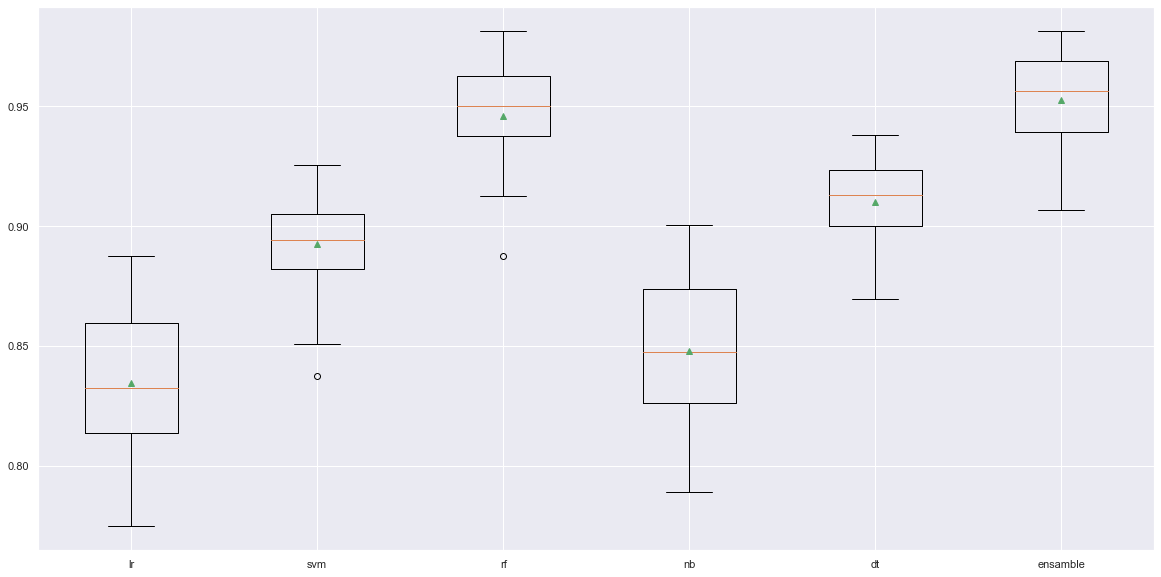

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean,std
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('svm', make_pipeline(StandardScaler(), SVC(gamma='auto'))))
    level0.append(('bayes', GaussianNB()))
    level0.append(('rf', RandomForestClassifier()))
    level0.append(('dt', DecisionTreeClassifier()))
    # define meta learner model
    level1 = make_pipeline(make_pipeline(StandardScaler(), SVC(gamma='auto')))
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    
    models = {"lr":LogisticRegression(),"svm":make_pipeline(StandardScaler(), SVC(gamma='auto')),'rf':RandomForestClassifier(),"nb":GaussianNB(),"dt":DecisionTreeClassifier(random_state=0),"ensamble":get_stacking()}

    return models

def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


x = Z.loc[:,['Age',"RestingBP","Cholesterol","MaxHR","Oldpeak","SexN","ChestPainTypeN","RestingECGN","ST_SlopeN","ExerciseAnginaN"]]
y = X.loc[:, 'HeartDisease']
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Vidimo prikaz svih algoritama pojedinačno te zajedničkog ansambla navedenih algoritama kako bismo ih mogli usporediti. Vidimo da ansambl daje najveću točnost s najmanjom varijancom.

In [37]:
import warnings
warnings.filterwarnings('ignore')

model = get_stacking()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
ensamble_accuracy = accuracy_score(y_pred,y_test)
ensamble_precision = precision_score(y_pred,y_test)
ensamble_recall = recall_score(y_pred,y_test)
ensamble_f1 = f1_score(y_pred,y_test)
ensamble_confusion = confusion_matrix(y_pred,y_test)

print("Ensamble")
print("--------------------\n")
print(f"Accuracy: {ensamble_accuracy}\nPrecision: {ensamble_precision}\nRecall: {ensamble_recall}\nF1: {ensamble_f1}\nConfusion: \n{ensamble_confusion}\n")

Ensamble
--------------------

Accuracy: 0.9203980099502488
Precision: 0.9575471698113207
Recall: 0.8982300884955752
F1: 0.9269406392694063
Confusion: 
[[167   9]
 [ 23 203]]



In [38]:
raw_data = {
            'Accuracy': [log_accuracy, nb_accuracy, svm_accuracy, rf_accuracy,dt_accuracy,ensamble_accuracy],
            'Precision': [log_precision, nb_precision, svm_precision, rf_precision, dt_precision,ensamble_precision],
            'Recall': [log_recall, nb_recall, svm_recall, rf_recall, dt_recall,ensamble_recall],
            'F1': [log_f1, nb_f1, svm_f1, rf_f1, dt_f1,ensamble_f1],
            'Confusion matrix': [log_confusion, nb_confusion, svm_confusion, rf_confusion, dt_confusion,ensamble_confusion],
            }

df = pd.DataFrame(raw_data,
                  index=pd.Index(['Logistic regression', 'Naive bayes classifier', 'Support vector machine', 'RandomForestClassifier', 'Decision tree','Ensamble'], name='Algorithm'))

df.style.highlight_max()
display(df.round(2))

,Accuracy,Precision,Recall,F1,Confusion matrix
Algorithm,,,,,
Logistic regression,0.88,0.90,0.88,0.89,"[[90, 13], [15, 112]]"
Naive bayes classifier,0.85,0.88,0.85,0.87,"[[86, 15], [19, 110]]"
Support vector machine,0.93,0.95,0.93,0.94,"[[96, 6], [9, 119]]"
RandomForestClassifier,0.92,0.96,0.89,0.92,"[[166, 9], [24, 203]]"
Decision tree,0.90,0.92,0.89,0.91,"[[165, 16], [25, 196]]"
Ensamble,0.92,0.96,0.90,0.93,"[[167, 9], [23, 203]]"


Vidimo da ansambl zapravo postiše dosta slične rezultate kao Slučajna šuma te Stroj potpornih vektora pa možemo zaključiti da ga za ovaj primjer nije nužno koristiti.